In [7]:
from sklearn.svm import SVC
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

#X=iris['data']

#print(X)
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
#print(X)
#print(y)

setosa_or_versicolor = (y == 0) | (y == 1)
#print(setosa_or_versicolor)
x_train_raw = X[setosa_or_versicolor]
y_train_raw = y[setosa_or_versicolor]

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_train_raw, y_train_raw,test_size=0.3, random_state=2017)

In [8]:
x_index_0=np.where(y_train ==0)
x_index_1=np.where(y_train ==1)

x_axis_0=x_train[x_index_0][:,0]
y_axis_0=x_train[x_index_0][:,1]

x_axis_1=x_train[x_index_1][:,0]
y_axis_1=x_train[x_index_1][:,1]


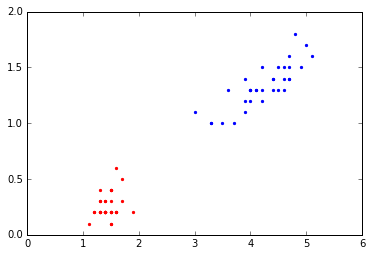

In [9]:
import matplotlib.pyplot as plt
plt.figure()
area = 5  # 0 to 15 point radii
plt.scatter(x_axis_0, y_axis_0, s=area, color='red')
plt.scatter(x_axis_1, y_axis_1, s=area, color='blue')
plt.show()

In [28]:
# SVM Classifier model
#svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf = SVC(kernel="linear", C=0.005)
svm_clf.fit(x_train, y_train)

SVC(C=0.005, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

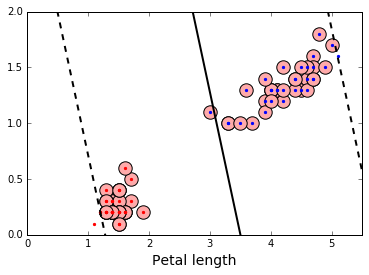

In [29]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.scatter(x_axis_0, y_axis_0, s=area, color='red')
plt.scatter(x_axis_1, y_axis_1, s=area, color='blue')

plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


In [30]:
y_pred_train=svm_clf.predict(x_train)
y_pred_test=svm_clf.predict(x_test)
from sklearn import metrics
score_train = metrics.accuracy_score(y_train, y_pred_train)
score_test = metrics.accuracy_score(y_test, y_pred_test)
print(score_train)
print(score_test)

0.985714285714
1.0


In [31]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
print(w)
print(b)

[ 0.45    0.1765]
-1.57635000557


In [33]:
import pickle
filename='models/linearsvm.pkl'
pickle.dump(svm_clf, open(filename, 'wb'))

[ 0.01398  0.00541]
-0.0475080002785


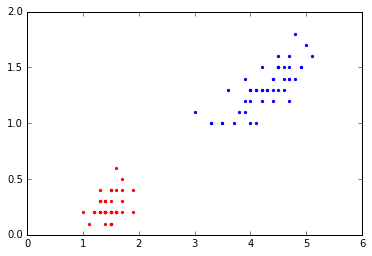

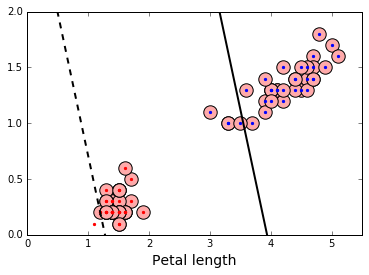

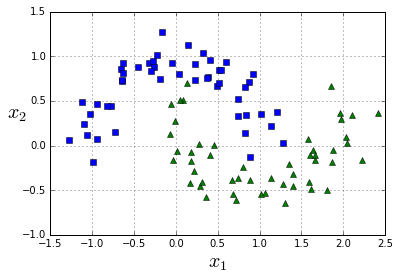

In [40]:
from sklearn.datasets import make_moons
x_train, y_train = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(x_train, y_train, [-1.5, 2.5, -1, 1.5])
plt.show()

In [41]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=0.1)
svm_clf.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
print(w)
print(b)
xmin=-1.5
xmax=2.5
x0 = np.linspace(xmin, xmax, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
#decision_boundary

[ 0.61529992 -1.22825188]
-0.0311770089055


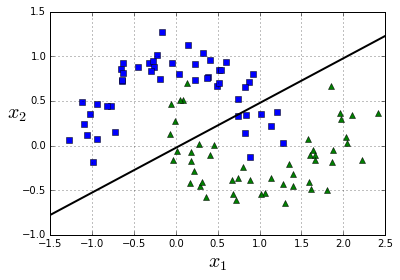

In [43]:
plot_dataset(x_train, y_train, [-1.5, 2.5, -1, 1.5])
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.show()

In [90]:
poly_svc=SVC(kernel="rbf",gamma=1,C=10,random_state=2017)
poly_svc.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=2017, shrinking=True,
  tol=0.001, verbose=False)

(10000, 2)
[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]]


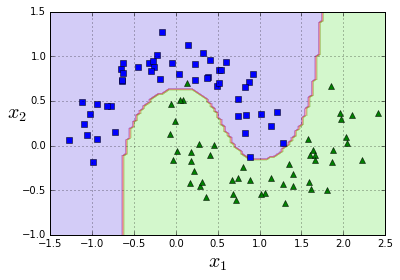

In [91]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    #print(x0)
    X = np.c_[x0.ravel(), x1.ravel()]
    print(X.shape)
    y_pred = clf.predict(X).reshape(x0.shape)
    print(y_pred)
    #y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(x_train, y_train, [-1.5, 2.5, -1, 1.5])

plt.show()